#PCA

*Previous notebooks we see due to large dataset it takes time to train and validation.*




*We are going to take 10 features from 784 features*

>>>>Steps
- First we take accuracy using traditions to find accuracy
- First step we have done previously
- Then apply **PCA** on original dataset  and reduce dataset dimensions
- Check wether it reduce dimension and take less time in training

*PCA doing projections to reduce dimensions*

*PCA loss spatial information so if we want to make original dimension from 10 dimension PCA have multiple possibilities*

*We Projecting higher dimensional data into low dimensional space.*


#Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
np.set_printoptions(threshold=np.inf)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Loading Dataset

In [3]:
xx, yy = fetch_openml('mnist_784', version = 1, return_X_y=True, as_frame=False)

C:\Users\Hamza Iqbal\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


*Shape of Data*

In [4]:
print(xx.shape)
print(yy.shape)

(70000, 784)
(70000,)


#Using traditional Method
*Using all features*

*Splitting Data*

In [5]:
# split into train test sets
xx_train, xx_test, yy_train, yy_test = train_test_split(xx, yy, test_size=0.15)

In [6]:
#Finally, we are training our KNn using traditionla method
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors=3)

In [7]:
classifier_knn.fit(xx_train, yy_train)

KNeighborsClassifier(n_neighbors=3)

In [8]:
yy_pred = classifier_knn.predict(xx_test)

In [9]:
score_traditional = accuracy_score(yy_test, yy_pred)
print(score_traditional)

0.9731428571428572


# Using PCA

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca= PCA(n_components=19)
X_train_pca=pca.fit_transform(xx_train,)
X_test_pca=pca.transform(xx_test)

In [12]:
X_train_pca.shape, X_test_pca.shape

((59500, 19), (10500, 19))

#Magic

In [13]:
#Finally, we are training our KNn using pca
from sklearn.neighbors import KNeighborsClassifier
classifier_knn_pca = KNeighborsClassifier(n_neighbors=3)

In [14]:
classifier_knn_pca.fit(X_train_pca,yy_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
predictions_pca=classifier_knn_pca.predict(X_test_pca)

**Accuracy of the pca model**

In [16]:
score_pca=accuracy_score(yy_test,predictions_pca)

In [17]:
print("Traditional: ",score_traditional)
print("PCA_KNN: ",score_pca)

Traditional:  0.9731428571428572
PCA_KNN:  0.9685714285714285


#Loop

In [18]:
test_scores= []
classifier_knn_lpca = KNeighborsClassifier(n_neighbors=3)

In [19]:
for i in range(10,30):
  pca=PCA(n_components=i)
  X_train_pca=pca.fit_transform(xx_train)
  X_test_pca=pca.transform(xx_test)
  classifier_knn_lpca.fit(X_train_pca, yy_train)
  predictions_lpca = classifier_knn_lpca.predict(X_test_pca)
  score_pca=accuracy_score(yy_test,predictions_lpca)
  test_scores.append(score_pca)

In [20]:
print(test_scores)

[0.9281904761904762, 0.9373333333333334, 0.9477142857142857, 0.9559047619047619, 0.9587619047619048, 0.9596190476190476, 0.9637142857142857, 0.9644761904761905, 0.9673333333333334, 0.9687619047619047, 0.97, 0.9708571428571429, 0.9716190476190476, 0.9736190476190476, 0.9737142857142858, 0.9752380952380952, 0.9762857142857143, 0.9758095238095238, 0.976, 0.9760952380952381]


In [21]:
test_scores_knn=test_scores

In [22]:
index=10
for i in test_scores:
  print("Index=",index,"Accuracy: ",i,end="\n")
  index = index +1

Index= 10 Accuracy:  0.9281904761904762
Index= 11 Accuracy:  0.9373333333333334
Index= 12 Accuracy:  0.9477142857142857
Index= 13 Accuracy:  0.9559047619047619
Index= 14 Accuracy:  0.9587619047619048
Index= 15 Accuracy:  0.9596190476190476
Index= 16 Accuracy:  0.9637142857142857
Index= 17 Accuracy:  0.9644761904761905
Index= 18 Accuracy:  0.9673333333333334
Index= 19 Accuracy:  0.9687619047619047
Index= 20 Accuracy:  0.97
Index= 21 Accuracy:  0.9708571428571429
Index= 22 Accuracy:  0.9716190476190476
Index= 23 Accuracy:  0.9736190476190476
Index= 24 Accuracy:  0.9737142857142858
Index= 25 Accuracy:  0.9752380952380952
Index= 26 Accuracy:  0.9762857142857143
Index= 27 Accuracy:  0.9758095238095238
Index= 28 Accuracy:  0.976
Index= 29 Accuracy:  0.9760952380952381


_____
_____
_____
#Decision Tree

_____
_____
____

*Traditional Steps*

In [23]:
#Finally, we are training our KNn using traditionla method
from sklearn.tree import DecisionTreeClassifier
classifier_dtc = DecisionTreeClassifier(max_depth=20)

In [24]:
classifier_dtc.fit(xx_train, yy_train)

DecisionTreeClassifier(max_depth=20)

In [25]:
yy_pred = classifier_dtc.predict(xx_test)

In [26]:
print("Decision Tree Classifier")
score_traditional_dtc = accuracy_score(yy_test, yy_pred)
print(score_traditional_dtc)

Decision Tree Classifier
0.8733333333333333


#Magic

In [27]:
#Finally, we are training our Decision Tree Calssifier
classifier_dtc_pca = DecisionTreeClassifier(max_depth=20)

In [28]:
classifier_dtc_pca.fit(X_train_pca,yy_train)

DecisionTreeClassifier(max_depth=20)

In [29]:
predictions_pca_dtc=classifier_dtc_pca.predict(X_test_pca)

Accuracy of DTC

In [30]:
score_pca_dtc=accuracy_score(yy_test,predictions_pca_dtc)

In [31]:
print("Traditional_DTC: ",score_traditional_dtc)
print("PCA_DTC: ",score_pca_dtc)

Traditional_DTC:  0.8733333333333333
PCA_DTC:  0.8526666666666667


#Loop DTC

In [32]:
test_scores_dtc= []
# classifier_dtc_lpca = DecisionTreeClassifier(max_depth=20)

In [33]:
for i in range(10,30):
  pca=PCA(n_components=i)
  X_train_pca=pca.fit_transform(xx_train)
  X_test_pca=pca.transform(xx_test)
  classifier_dtc_pca.fit(X_train_pca, yy_train)
  predictions_lpca = classifier_dtc_pca.predict(X_test_pca)
  score_pca_dtc=accuracy_score(yy_test,predictions_lpca)
  test_scores_dtc.append(score_pca_dtc)

In [34]:
test_scores_dtc=test_scores_dtc

In [35]:
index=10
for i in test_scores_dtc:
  print("Index=",index,"Accuracy: ",i,end="\n")
  index = index +1

Index= 10 Accuracy:  0.8343809523809523
Index= 11 Accuracy:  0.8368571428571429
Index= 12 Accuracy:  0.8421904761904762
Index= 13 Accuracy:  0.8459047619047619
Index= 14 Accuracy:  0.8534285714285714
Index= 15 Accuracy:  0.8557142857142858
Index= 16 Accuracy:  0.8552380952380952
Index= 17 Accuracy:  0.8513333333333334
Index= 18 Accuracy:  0.8533333333333334
Index= 19 Accuracy:  0.8532380952380952
Index= 20 Accuracy:  0.856
Index= 21 Accuracy:  0.8538095238095238
Index= 22 Accuracy:  0.8561904761904762
Index= 23 Accuracy:  0.8529523809523809
Index= 24 Accuracy:  0.8554285714285714
Index= 25 Accuracy:  0.8539047619047619
Index= 26 Accuracy:  0.856
Index= 27 Accuracy:  0.8582857142857143
Index= 28 Accuracy:  0.8541904761904762
Index= 29 Accuracy:  0.8520952380952381


_____
_____
____
#Random Forest

_____
_____
_____

In [36]:
#Finally, we are training our KNn using traditionla method
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=20)

Traditional

In [37]:
classifier_rf.fit(xx_train, yy_train)

RandomForestClassifier(random_state=20)

In [38]:
yy_pred = classifier_dtc.predict(xx_test)

In [39]:
print("Random Forest Classifier")
score_traditional_rf = accuracy_score(yy_test, yy_pred)
print("Random_Forset: ",score_traditional_rf)

Random Forest Classifier
Random_Forset:  0.8733333333333333


PCA

In [40]:
#Finally, we are training our Decision Tree Calssifier
classifier_rf_pca = DecisionTreeClassifier(random_state=20)

In [41]:
classifier_rf_pca.fit(X_train_pca,yy_train)

DecisionTreeClassifier(random_state=20)

In [42]:
predictions_rf_pca=classifier_rf_pca.predict(X_test_pca)

Accuracy RF

In [43]:
score_pca_rf=accuracy_score(yy_test,predictions_rf_pca)

In [44]:
print("Traditional_RF: ",score_traditional_rf)
print("PCA_RF: ",score_pca_rf)

Traditional_RF:  0.8733333333333333
PCA_RF:  0.8534285714285714


#Loop

In [45]:
test_scores_rf= []

In [46]:
for i in range(10,30):
  pca=PCA(n_components=i)
  X_train_pca=pca.fit_transform(xx_train)
  X_test_pca=pca.transform(xx_test)
  classifier_rf_pca.fit(X_train_pca, yy_train)
  predictions_lpca = classifier_rf_pca.predict(X_test_pca)
  score_pca_rf=accuracy_score(yy_test,predictions_lpca)
  test_scores_rf.append(score_pca_rf)

In [47]:
test_scores_rf=test_scores_rf

In [48]:
index=10
for i in test_scores_rf:
  print("Index=",index,"Accuracy: ",i,end="\n")
  index = index +1

Index= 10 Accuracy:  0.8301904761904761
Index= 11 Accuracy:  0.8317142857142857
Index= 12 Accuracy:  0.8399047619047619
Index= 13 Accuracy:  0.8441904761904762
Index= 14 Accuracy:  0.8501904761904762
Index= 15 Accuracy:  0.8506666666666667
Index= 16 Accuracy:  0.8478095238095238
Index= 17 Accuracy:  0.8500952380952381
Index= 18 Accuracy:  0.8475238095238096
Index= 19 Accuracy:  0.849047619047619
Index= 20 Accuracy:  0.8492380952380952
Index= 21 Accuracy:  0.8526666666666667
Index= 22 Accuracy:  0.8493333333333334
Index= 23 Accuracy:  0.8515238095238096
Index= 24 Accuracy:  0.851047619047619
Index= 25 Accuracy:  0.8523809523809524
Index= 26 Accuracy:  0.8546666666666667
Index= 27 Accuracy:  0.8519047619047619
Index= 28 Accuracy:  0.8506666666666667
Index= 29 Accuracy:  0.8503809523809523


____
_____
_____
#Naive Bayes
_____
___
_____


In [49]:
#Finally, we are training our KNn using traditionla method
from sklearn.naive_bayes import GaussianNB
classifier_gnb=GaussianNB()
classifier_gnb.fit(xx_train, yy_train)

GaussianNB()

In [50]:
yy_pred_gnb = classifier_gnb.predict(xx_test)

In [51]:
print("Naive Bayes Classifier")
score_traditional_gnb = accuracy_score(yy_test, yy_pred_gnb)
print("Naive Bayes: ",score_traditional_gnb)

Naive Bayes Classifier
Naive Bayes:  0.5462857142857143


*PCA*

In [52]:
#Finally, we are training our Decision Tree Calssifier
classifier_gnb_pca = GaussianNB()

In [53]:
classifier_gnb_pca.fit(X_train_pca,yy_train)

GaussianNB()

In [54]:
predictions_gnb_pca=classifier_gnb_pca.predict(X_test_pca)

In [55]:
score_pca_gnb=accuracy_score(yy_test,predictions_gnb_pca)

In [56]:
print("Traditional_gnb: ",score_traditional_gnb)
print("PCA_gnb: ",score_pca_gnb)

Traditional_gnb:  0.5462857142857143
PCA_gnb:  0.8648571428571429


#Loop

In [57]:
test_scores_gnb= []

In [59]:
for i in range(10,30):
  pca=PCA(n_components=i)
  X_train_pca=pca.fit_transform(xx_train)
  X_test_pca=pca.transform(xx_test)
  classifier_gnb_pca.fit(X_train_pca, yy_train)
  predictions_lpca = classifier_gnb_pca.predict(X_test_pca)
  score_pca_gnb=accuracy_score(yy_test,predictions_lpca)
  test_scores_gnb.append(score_pca_rf)

In [60]:
test_scores_gnb=test_scores_gnb

In [62]:
index=10
for i in test_scores_gnb:
  print("Index=",index,"Accuracy: ",i,end="\n")
  index = index +1

Index= 10 Accuracy:  0.8503809523809523
Index= 11 Accuracy:  0.8503809523809523
Index= 12 Accuracy:  0.8503809523809523
Index= 13 Accuracy:  0.8503809523809523
Index= 14 Accuracy:  0.8503809523809523
Index= 15 Accuracy:  0.8503809523809523
Index= 16 Accuracy:  0.8503809523809523
Index= 17 Accuracy:  0.8503809523809523
Index= 18 Accuracy:  0.8503809523809523
Index= 19 Accuracy:  0.8503809523809523
Index= 20 Accuracy:  0.8503809523809523
Index= 21 Accuracy:  0.8503809523809523
Index= 22 Accuracy:  0.8503809523809523
Index= 23 Accuracy:  0.8503809523809523
Index= 24 Accuracy:  0.8503809523809523
Index= 25 Accuracy:  0.8503809523809523
Index= 26 Accuracy:  0.8503809523809523
Index= 27 Accuracy:  0.8503809523809523
Index= 28 Accuracy:  0.8503809523809523
Index= 29 Accuracy:  0.8503809523809523
Index= 30 Accuracy:  0.8503809523809523
Index= 31 Accuracy:  0.8503809523809523
Index= 32 Accuracy:  0.8503809523809523
Index= 33 Accuracy:  0.8503809523809523
Index= 34 Accuracy:  0.8503809523809523


ValueError: ignored

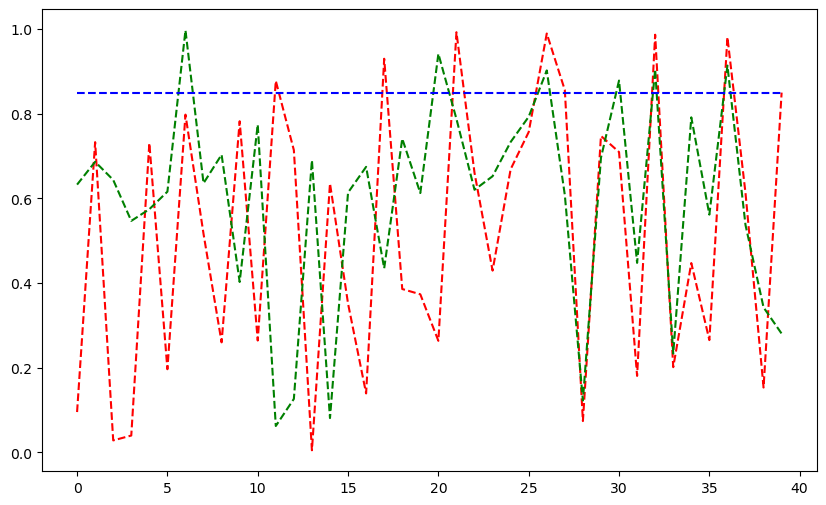

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Generate example data
time = np.arange(0, 40, 1)
test_scores = np.random.uniform(0, 1, size=len(time))  # Example test scores between 0 and 1
test_scores_dtc = np.random.uniform(0, 1, size=len(time))  # Example test scores DTC between 0 and 1

# Set the figure size
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed

plt.plot(time, test_scores,     "r--", label="KNN")
plt.plot(time, test_scores_dtc, "g--", label="DTC")
plt.plot(time, test_scores_gnb, "b--", label="GNB")
plt.plot(time, test_scores_rf,  "y--", label="RF")




# Set x-axis range
plt.xlim(10, 30)

# Set y-axis limit
plt.ylim(0, 1)

plt.xlabel("PCA Range(10 to 30)")
plt.ylabel("Scores")
plt.title("Comparison of different Classifier")
plt.legend()

plt.show()


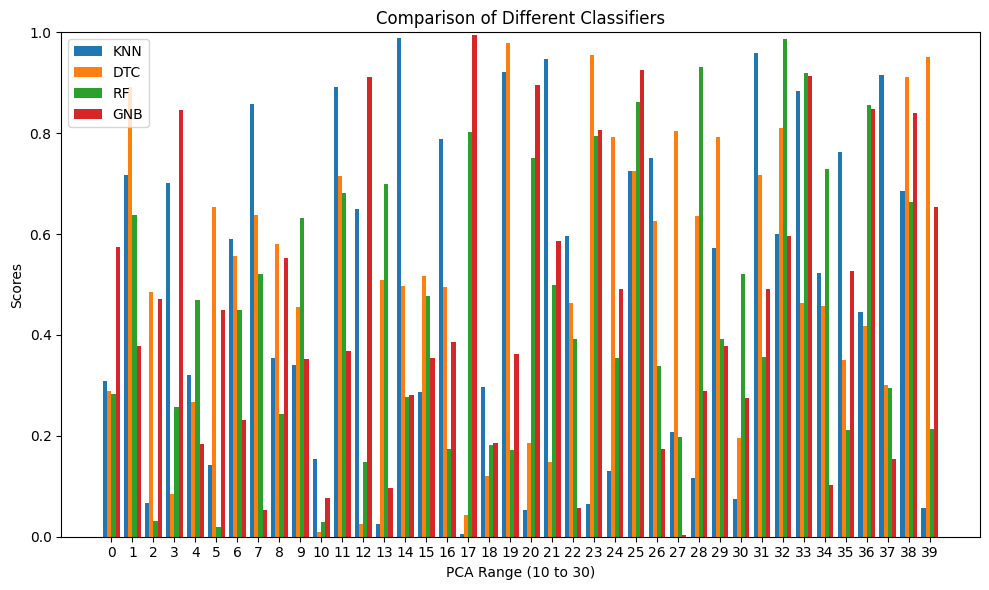

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate example data
time = np.arange(0, 40, 1)
test_scores = np.random.uniform(0, 1, size=len(time))  # Example test scores between 0 and 1
test_scores_dtc = np.random.uniform(0, 1, size=len(time))  # Example test scores DTC between 0 and 1
test_scores_rf = np.random.uniform(0, 1, size=len(time))  # Example test scores RF between 0 and 1
test_scores_gnb = np.random.uniform(0, 1, size=len(time))  # Example test scores GNB between 0 and 1

# Set the figure size
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed

# Create x values for each bar group
x = np.arange(len(time))

# Create bar plots
plt.bar(x - 0.3, test_scores, width=0.2, label="KNN")
plt.bar(x - 0.1, test_scores_dtc, width=0.2, label="DTC")
plt.bar(x + 0.1, test_scores_rf, width=0.2, label="RF")
plt.bar(x + 0.3, test_scores_gnb, width=0.2, label="GNB")

# Set x-axis tick labels and tick positions
plt.xticks(x, time)

# Set y-axis limit
plt.ylim(0, 1)

plt.xlabel("PCA Range (10 to 30)")
plt.ylabel("Scores")
plt.title("Comparison of Different Classifiers")
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
orig_KNN=score_traditional
orig_dtc=score_traditional_dtc
orig_rf=score_traditional_rf
org_gnb=score_traditional_gnb

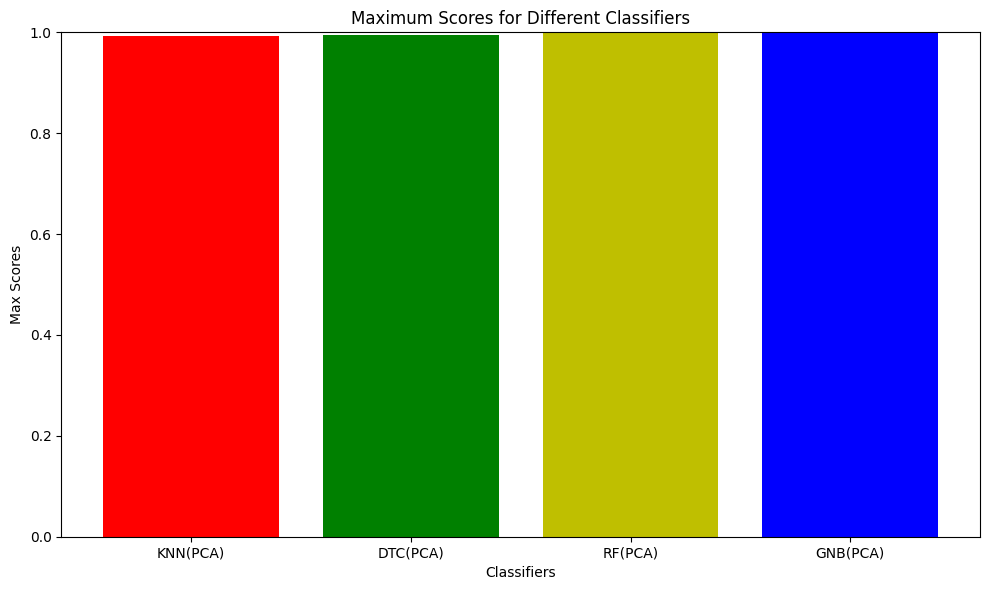

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate example data
time = np.arange(0, 40, 1)
test_scores = np.random.uniform(0, 1, size=len(time))  # Example test scores between 0 and 1
test_scores_dtc = np.random.uniform(0, 1, size=len(time))  # Example test scores DTC between 0 and 1
test_scores_rf = np.random.uniform(0, 1, size=len(time))  # Example test scores RF between 0 and 1
test_scores_gnb = np.random.uniform(0, 1, size=len(time))  # Example test scores GNB between 0 and 1

# Calculate maximum scores for each classifier
max_scores = [max(test_scores), max(test_scores_dtc), max(test_scores_rf), max(test_scores_gnb)]

# Classifier labels
classifiers = ["KNN(PCA)", "DTC(PCA)", "RF(PCA)", "GNB(PCA)"]

# Set the figure size
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed

# Create a bar plot for maximum scores
plt.bar(classifiers, max_scores, color=['r', 'g', 'y', 'b'])

plt.xlabel("Classifiers")
plt.ylabel("Max Scores")
plt.title("Maximum Scores for Different Classifiers")
plt.ylim(0, 1)  # Set y-axis limit

plt.tight_layout()
plt.show()
